## Edge
When there's a sharp change in the intensity

In [45]:
import os
import cv2
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
os.listdir()

['test_image.png', 'sobel_filter.ipynb', '.ipynb_checkpoints']

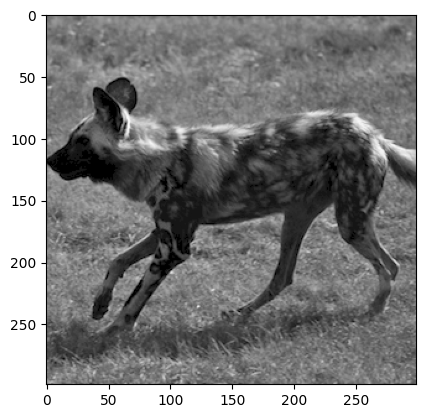

In [43]:
filename = "test_image.png"
img = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)

plt.imshow(img, cmap="gray")
# plt.axis('off')
plt.show()

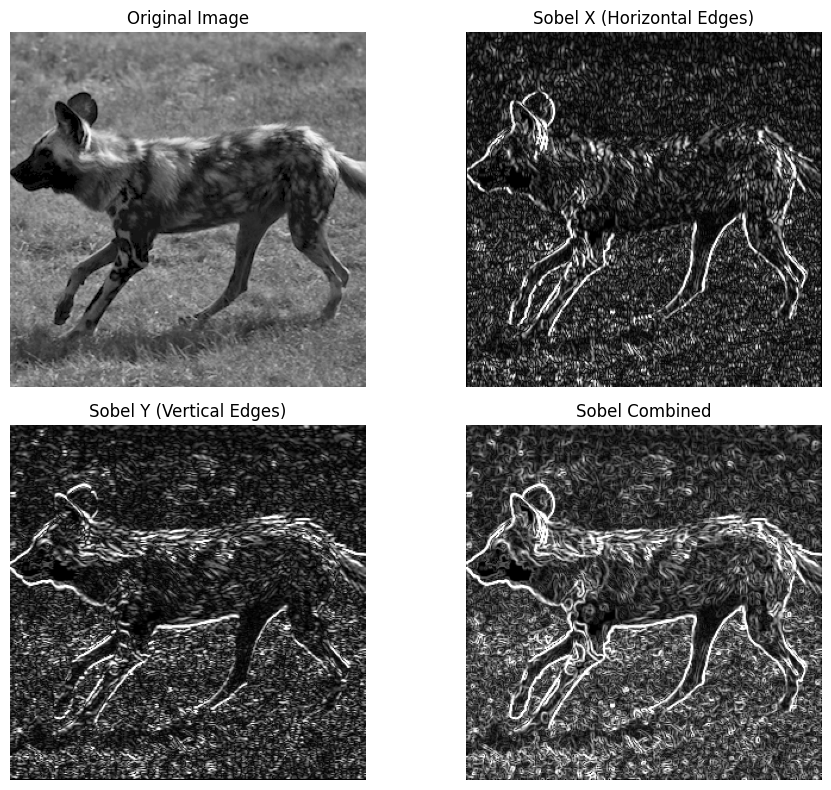

In [46]:
sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
# Sobel for vertical edges (dx=0, dy=1)
sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)

# Compute the magnitude of gradients (optional)
sobel_combined = np.sqrt(sobel_x**2 + sobel_y**2)
sobel_combined = cv2.convertScaleAbs(sobel_combined)  # Convert to uint8 for display

# Display the results
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(cv2.convertScaleAbs(sobel_x), cmap='gray')
plt.title('Sobel X (Horizontal Edges)')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(cv2.convertScaleAbs(sobel_y), cmap='gray')
plt.title('Sobel Y (Vertical Edges)')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(sobel_combined, cmap='gray')
plt.title('Sobel Combined')
plt.axis('off')

plt.tight_layout()
plt.show()